<a href="https://colab.research.google.com/github/PratikshaShelke24/data-science/blob/main/mlimplementaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load dataset
data = pd.read_csv("Housing.csv")

In [4]:
# Display first few rows
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
# Check for missing values
print(data.isnull().sum())



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
# Fill missing values with median for numeric columns only
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.median())

In [10]:
print(data.basement )

0       no
1       no
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542     no
543     no
544     no
Name: basement, Length: 545, dtype: object


In [11]:
X = data[['area', 'bedrooms']]  # Features - Assuming 'area' and 'bedrooms' are the actual column names
y = data['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predictions
y_pred = model.predict(X_test)


In [15]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [16]:

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3280176595474.013
R-squared: 0.3510473817558726


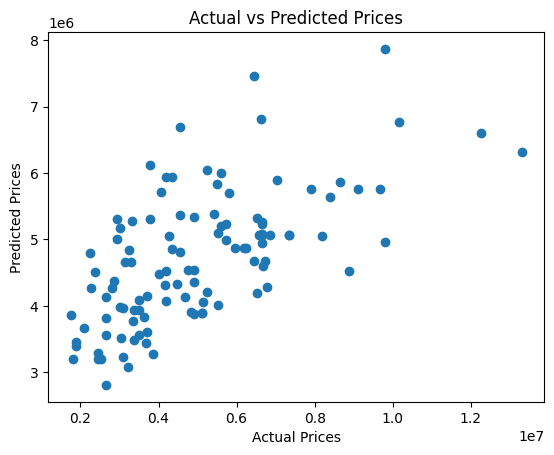

In [17]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [18]:
import joblib

# Save the trained model
joblib.dump(model, "housing_price_model.pkl")

# Load the model later
loaded_model = joblib.load("housing_price_model.pkl")


In [19]:
from flask import Flask, request, jsonify
import joblib
import numpy as np



In [20]:
# Load model
model = joblib.load("housing_price_model.pkl")


In [21]:
# Create app
app = Flask(__name__)


In [ ]:
@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    features = np.array([data['SquareFeet'], data['Bedrooms']]).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"predicted_price": prediction})

if __name__ == "__main__":
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
files.download("housing_price_model.pkl")